In [2]:
import pandas as pd

# Load the uploaded CSV files
c0_file_path = 'C0.csv'
c1_file_path = 'C1.csv'

# Read the CSV files
c0_data = pd.read_csv(c0_file_path)
c1_data = pd.read_csv(c1_file_path)

# Display the first few rows to understand their structure
c0_data.head(), c1_data.head()


(  GEN  REP LOC  Group  YR   PT Cluster LocYR      ENV  TEMP_v3  ...  RH_veg  \
 0  H1    1  OS    600  10  Pt1      C2  OS10  OS10Pt1     16.5  ...    78.0   
 1  H2    1  OS    600  10  Pt1   Other  OS10  OS10Pt1     16.5  ...    78.0   
 2  H3    1  OS    600  10  Pt1      C1  OS10  OS10Pt1     16.5  ...    78.0   
 3  H4    1  OS    500  10  Pt1   Other  OS10  OS10Pt1     16.5  ...    78.0   
 4  H5    1  OS    600  10  Pt1   Other  OS10  OS10Pt1     16.5  ...    78.0   
 
       VPD_veg  TEMP_flow  RH_flow    VPD_flow  TEMP_gf  RH_gf      VPD_gf  \
 0  524.476612       23.2     74.0  734.937034     21.7   75.0  645.336696   
 1  524.476612       23.2     74.0  734.937034     21.7   75.0  645.336696   
 2  524.476612       23.2     74.0  734.937034     21.7   75.0  645.336696   
 3  524.476612       23.2     74.0  734.937034     21.7   75.0  645.336696   
 4  524.476612       23.2     74.0  734.937034     21.7   75.0  645.336696   
 
    Region   Yield  
 0      CE  12.805  
 1    

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting numeric columns for PCA
c0_numeric = c0_data.select_dtypes(include=['float64', 'int64']).dropna(axis=1)
c1_numeric = c1_data.select_dtypes(include=['float64', 'int64']).dropna(axis=1)

# Standardizing the data
scaler = StandardScaler()
c0_scaled = scaler.fit_transform(c0_numeric)
c1_scaled = scaler.fit_transform(c1_numeric)

# Performing PCA
pca_c0 = PCA(n_components=2)
pca_c1 = PCA(n_components=2)

c0_pca_result = pca_c0.fit_transform(c0_scaled)
c1_pca_result = pca_c1.fit_transform(c1_scaled)



In [6]:
c0_pca_result = pca_c0.fit_transform(c0_scaled)
c1_pca_result = pca_c1.fit_transform(c1_scaled)


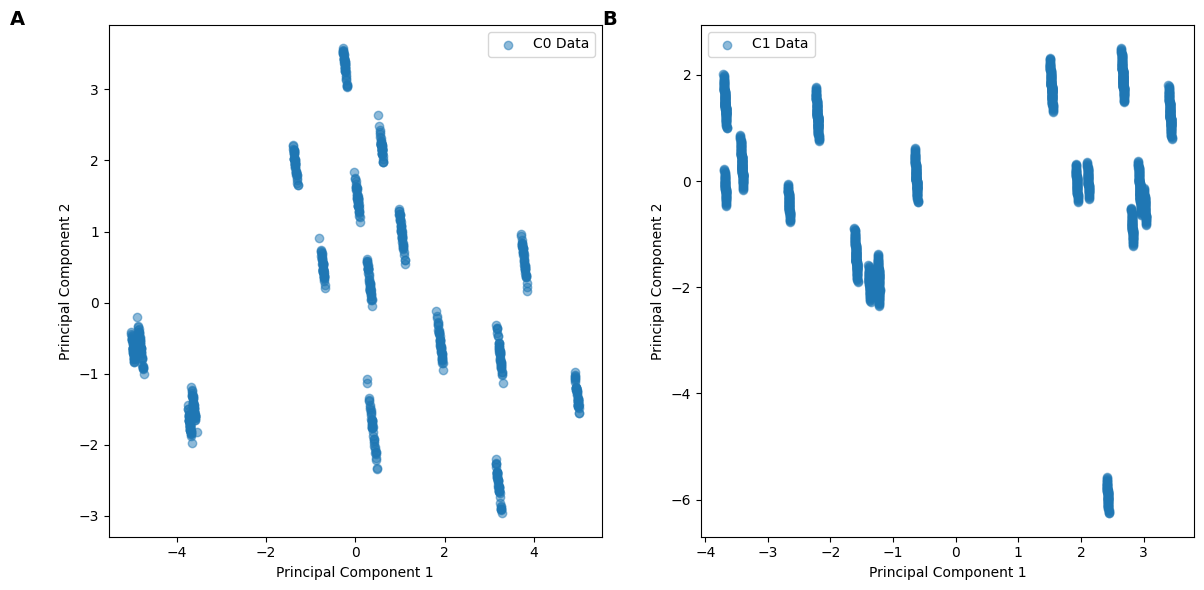

In [7]:
plt.figure(figsize=(12, 6))

# PCA for C0
plt.subplot(1, 2, 1)
plt.scatter(c0_pca_result[:, 0], c0_pca_result[:, 1], alpha=0.5, label='C0 Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.text(-0.2, 1.0, 'A', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

# PCA for C1
plt.subplot(1, 2, 2)
plt.scatter(c1_pca_result[:, 0], c1_pca_result[:, 1], alpha=0.5, label='C1 Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.text(-0.2, 1.0, 'B', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
c0_data = pd.read_csv('C0.csv')
c1_data_updated = pd.read_csv('C1.csv')

# Define the variables of interest
variables_of_interest = ['Yield', 'TEMP_flow', 'RH_flow', 'VPD_flow']

# Group by 'ENV' and calculate means for C0
c0_env_means = c0_data.groupby('ENV')[variables_of_interest].mean().round(2)

# Group by 'ENV' and calculate means for C1
c1_env_means = c1_data_updated.groupby('ENV')[variables_of_interest].mean().round(2)



In [9]:
c0_env_means

,Yield,TEMP_flow,RH_flow,VPD_flow
ENV,,,,
ADA10Pt2,12.32,30.8,63.5,1609.14
ADA11Pt2,9.76,29.3,63.9,1460.77
ALT10Pt1,8.87,27.6,54.8,1657.72
ALT10Pt2,9.48,29.1,53.7,1852.08
ALT11Pt1,15.86,27.6,53.4,1709.07
ALT11Pt2,11.81,26.9,46.0,1901.19
KA10Pt1,10.18,23.1,73.0,758.62
KA11Pt1,8.71,22.2,67.0,878.12
MAN10Pt1,15.28,28.7,44.5,2169.49


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


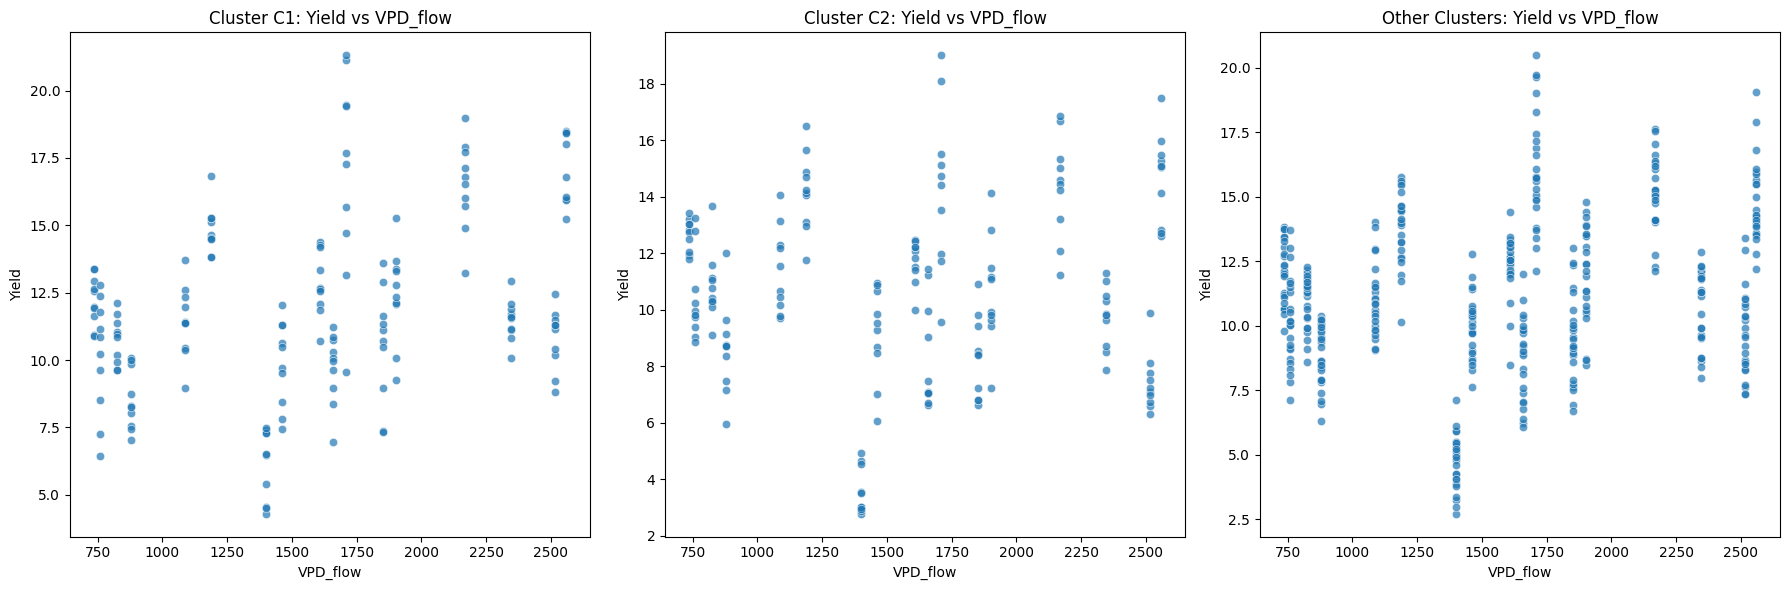

In [11]:
# Filter the data for different clusters
c1_data = c0_data[c0_data['Cluster'] == 'C1']
c2_data = c0_data[c0_data['Cluster'] == 'C2']
other_data = c0_data[~c0_data['Cluster'].isin(['C1', 'C2'])]

# Create the correlation plots
plt.figure(figsize=(18, 6))

# C1 Cluster
plt.subplot(1, 3, 1)
sns.scatterplot(data=c1_data, x='VPD_flow', y='Yield', alpha=0.7)
plt.title('Cluster C1: Yield vs VPD_flow')
plt.xlabel('VPD_flow')
plt.ylabel('Yield')

# C2 Cluster
plt.subplot(1, 3, 2)
sns.scatterplot(data=c2_data, x='VPD_flow', y='Yield', alpha=0.7)
plt.title('Cluster C2: Yield vs VPD_flow')
plt.xlabel('VPD_flow')
plt.ylabel('Yield')

# Other Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(data=other_data, x='VPD_flow', y='Yield', alpha=0.7)
plt.title('Other Clusters: Yield vs VPD_flow')
plt.xlabel('VPD_flow')
plt.ylabel('Yield')

plt.tight_layout()
plt.show()


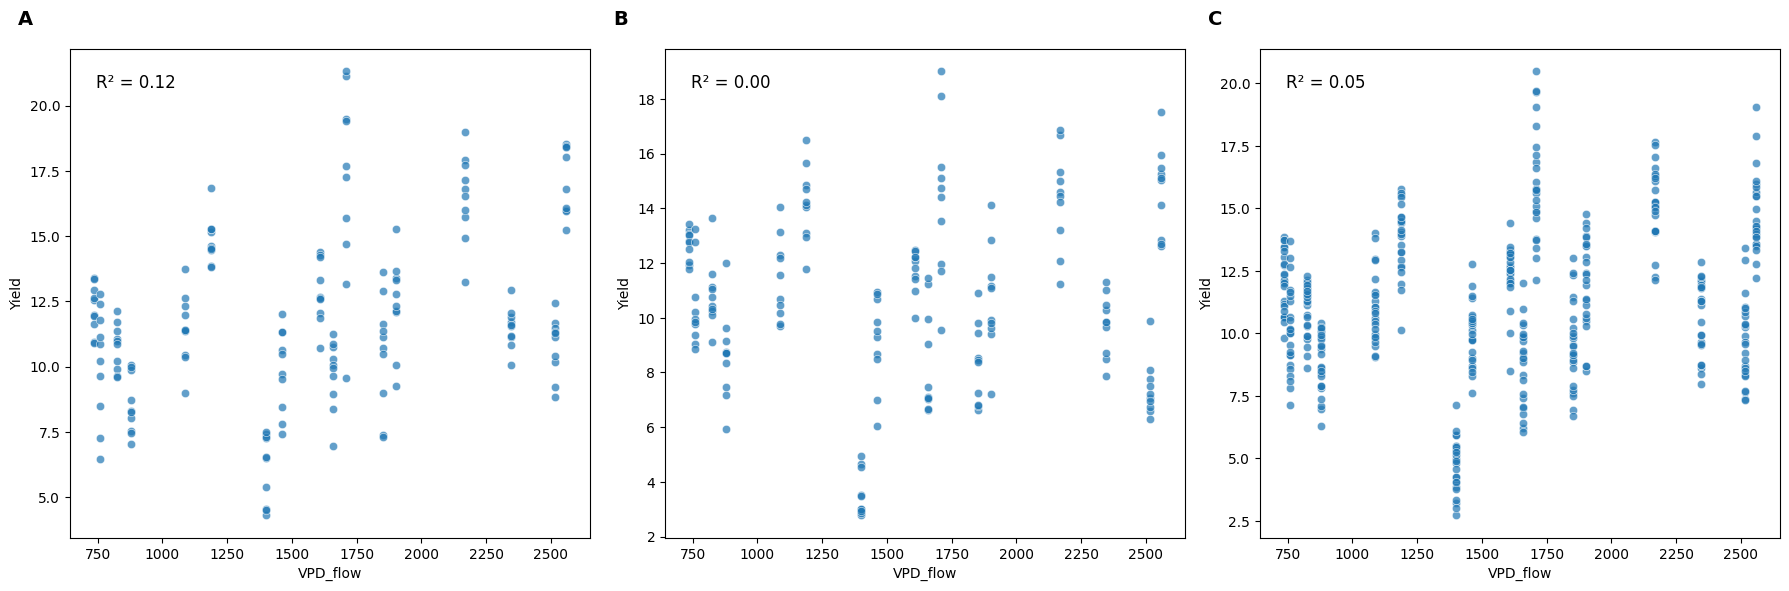

In [12]:
# Define a function to calculate R^2
def calculate_r2(x, y):
    model = LinearRegression()
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model.fit(x, y)
    return model.score(x, y)

# Filter the data for different clusters
c1_data = c0_data[c0_data['Cluster'] == 'C1']
c2_data = c0_data[c0_data['Cluster'] == 'C2']
other_data = c0_data[~c0_data['Cluster'].isin(['C1', 'C2'])]

# Create the correlation plots
plt.figure(figsize=(18, 6))

# C1 Cluster
plt.subplot(1, 3, 1)
sns.scatterplot(data=c1_data, x='VPD_flow', y='Yield', alpha=0.7)
r2_c1 = calculate_r2(c1_data['VPD_flow'], c1_data['Yield'])
plt.text(0.05, 0.95, f"R² = {r2_c1:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('VPD_flow')
plt.ylabel('Yield')
plt.text(-0.1, 1.05, 'A', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

# C2 Cluster
plt.subplot(1, 3, 2)
sns.scatterplot(data=c2_data, x='VPD_flow', y='Yield', alpha=0.7)
r2_c2 = calculate_r2(c2_data['VPD_flow'], c2_data['Yield'])
plt.text(0.05, 0.95, f"R² = {r2_c2:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('VPD_flow')
plt.ylabel('Yield')
plt.text(-0.1, 1.05, 'B', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

# Other Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(data=other_data, x='VPD_flow', y='Yield', alpha=0.7)
r2_other = calculate_r2(other_data['VPD_flow'], other_data['Yield'])
plt.text(0.05, 0.95, f"R² = {r2_other:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('VPD_flow')
plt.ylabel('Yield')
plt.text(-0.1, 1.05, 'C', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



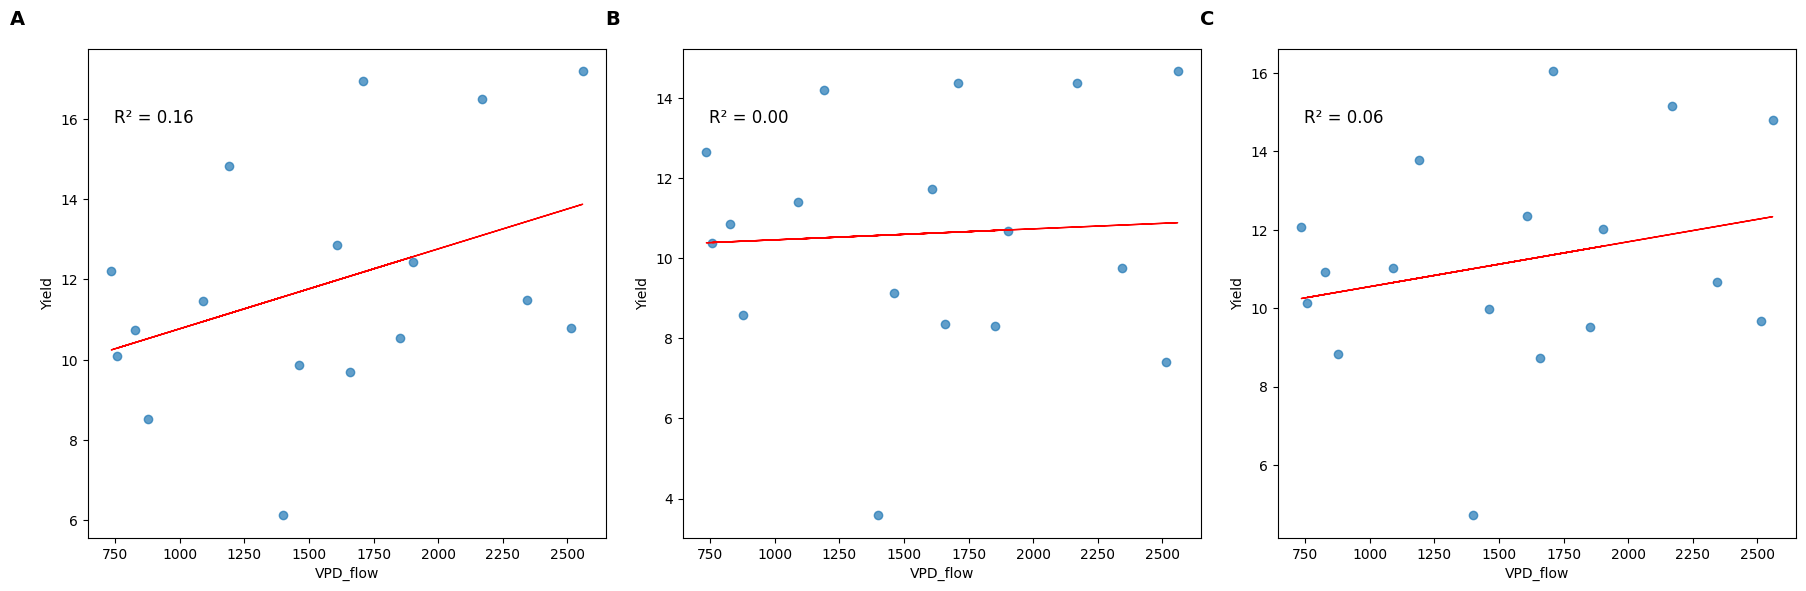

In [14]:
# Define a function to add trendlines and calculate R²
def add_trendline(ax, x, y, label_position):
    model = LinearRegression()
    x_reshaped = np.array(x).reshape(-1, 1)
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    r2 = model.score(x_reshaped, y)
    ax.plot(x, y_pred, color='red', linewidth=1)
    ax.text(label_position[0], label_position[1], f"R² = {r2:.2f}", transform=ax.transAxes, fontsize=12)
    return r2

# Calculate mean values per ENV for 'Yield' and 'VPD_flow' grouped by Cluster
c1_means = c0_data[c0_data['Cluster'] == 'C1'].groupby('ENV')[['Yield', 'VPD_flow']].mean()
c2_means = c0_data[c0_data['Cluster'] == 'C2'].groupby('ENV')[['Yield', 'VPD_flow']].mean()
other_means = c0_data[~c0_data['Cluster'].isin(['C1', 'C2'])].groupby('ENV')[['Yield', 'VPD_flow']].mean()

# Plot the correlations with trendlines
plt.figure(figsize=(18, 6))

# C1
ax1 = plt.subplot(1, 3, 1)
plt.scatter(c1_means['VPD_flow'], c1_means['Yield'], alpha=0.7)
r2_c1 = add_trendline(ax1, c1_means['VPD_flow'], c1_means['Yield'], (0.05, 0.85))
plt.xlabel('VPD_flow')
plt.ylabel('Yield')
plt.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=14, fontweight='bold')

# C2
ax2 = plt.subplot(1, 3, 2)
plt.scatter(c2_means['VPD_flow'], c2_means['Yield'], alpha=0.7)
r2_c2 = add_trendline(ax2, c2_means['VPD_flow'], c2_means['Yield'], (0.05, 0.85))
plt.xlabel('VPD_flow')
plt.ylabel('Yield')
plt.text(-0.15, 1.05, 'B', transform=ax2.transAxes, fontsize=14, fontweight='bold')

# Other
ax3 = plt.subplot(1, 3, 3)
plt.scatter(other_means['VPD_flow'], other_means['Yield'], alpha=0.7)
r2_other = add_trendline(ax3, other_means['VPD_flow'], other_means['Yield'], (0.05, 0.85))
plt.xlabel('VPD_flow')
plt.ylabel('Yield')
plt.text(-0.15, 1.05, 'C', transform=ax3.transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

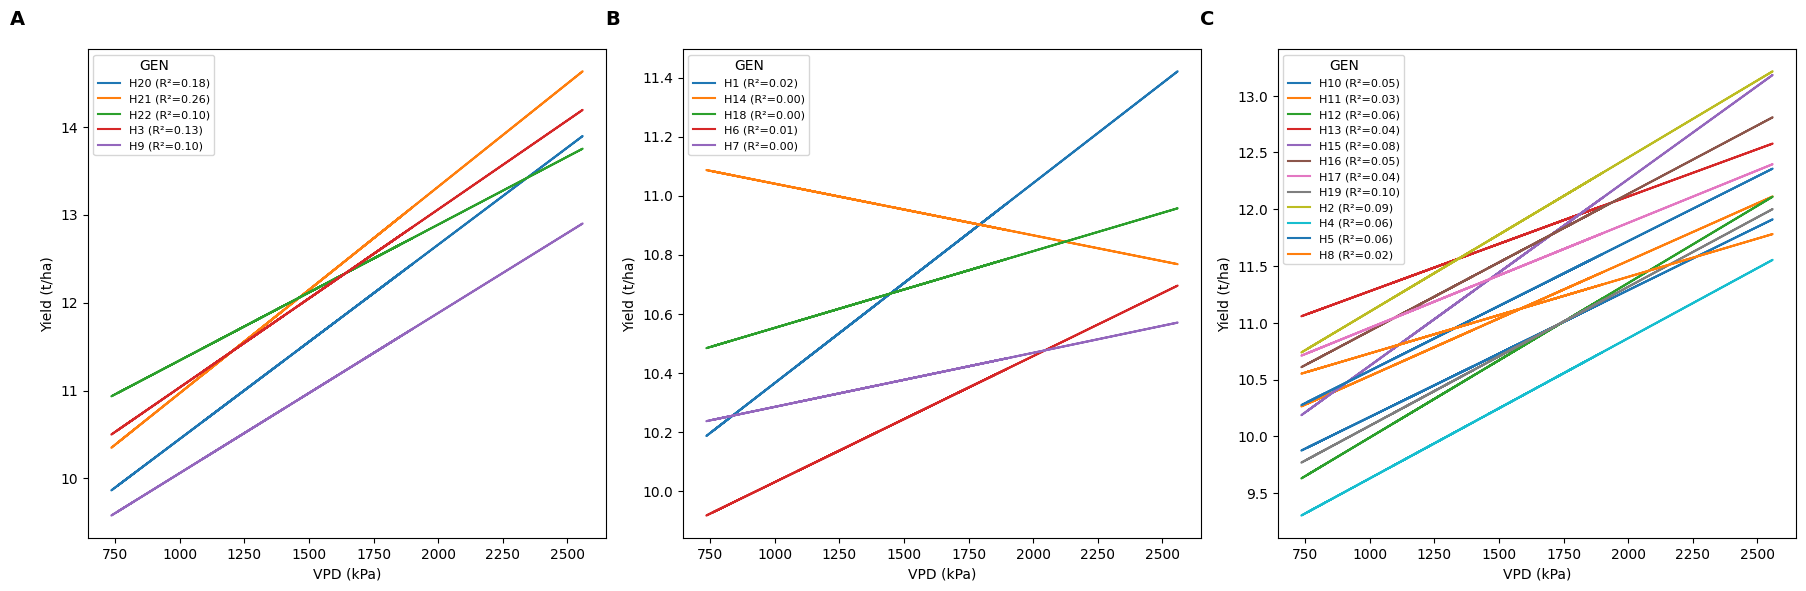

In [15]:
gen_means_c1 = c0_data[c0_data['Cluster'] == 'C1'].groupby(['GEN', 'ENV'])[['Yield', 'VPD_flow']].mean().reset_index()
gen_means_c2 = c0_data[c0_data['Cluster'] == 'C2'].groupby(['GEN', 'ENV'])[['Yield', 'VPD_flow']].mean().reset_index()
gen_means_other = c0_data[~c0_data['Cluster'].isin(['C1', 'C2'])].groupby(['GEN', 'ENV'])[['Yield', 'VPD_flow']].mean().reset_index()

# Define a function to plot trendlines with R² in the legend
def plot_trendlines(ax, gen_data, plot_label):
    for gen in gen_data['GEN'].unique():
        gen_subset = gen_data[gen_data['GEN'] == gen]
        x = gen_subset['VPD_flow']
        y = gen_subset['Yield']
        # Calculate trendline and R²
        model = LinearRegression()
        x_reshaped = np.array(x).reshape(-1, 1)
        model.fit(x_reshaped, y)
        y_pred = model.predict(x_reshaped)
        r2 = model.score(x_reshaped, y)
        # Plot the trendline
        ax.plot(x, y_pred, label=f"{gen} (R²={r2:.2f})")
    ax.set_xlabel('VPD (kPa)')
    ax.set_ylabel('Yield (t/ha)')
    ax.legend(title='GEN', fontsize=8, title_fontsize=10)
    ax.text(-0.15, 1.05, plot_label, transform=ax.transAxes, fontsize=14, fontweight='bold')

# Plotting
plt.figure(figsize=(18, 6))

# Plot for C1
ax1 = plt.subplot(1, 3, 1)
plot_trendlines(ax1, gen_means_c1, 'A')

# Plot for C2
ax2 = plt.subplot(1, 3, 2)
plot_trendlines(ax2, gen_means_c2, 'B')

# Plot for Other
ax3 = plt.subplot(1, 3, 3)
plot_trendlines(ax3, gen_means_other, 'C')

plt.tight_layout()
plt.show()